In [200]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [201]:
data=pd.read_csv('reslt.csv')
index=data.iloc[:,0]
# data.columns=data.iloc[0,:]
# data.index=data.iloc[:,0]
# data=data.iloc[1:,1:]
data=data.iloc[:,1:]
data.head()

,2019年,2018年,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年,2002年,2001年,2000年
0,66384.34,65789.22,66160.72,66043.51,66060.27,63964.83,63048.20,61222.62,58849.33,55911.31,53940.86,53434.29,50413.85,49804.23,48402.19,46946.95,43069.53,45705.75,45263.67,46217.52
1,14160.00,13881.02,14174.46,14050.16,14074.94,13587.52,13112.33,12939.98,12529.47,12203.61,12175.18,11993.11,11633.72,11655.96,10639.86,10114.13,9637.61,9861.33,10173.40,10679.27
2,49597.00,49049.18,48999.10,48890.78,48778.09,47134.25,46660.07,45052.75,43130.10,40617.59,38472.42,38322.15,35638.37,35008.49,34575.08,33611.17,30483.67,32815.45,31690.00,31786.35
3,61369.73,61003.58,61520.54,61666.53,61818.41,59601.54,58650.35,56659.03,54061.73,51196.75,49243.35,48569.44,45962.96,45099.24,42776.01,41157.21,37428.73,39798.66,39648.21,40522.36
4,20961.40,21212.90,21267.59,21109.42,21214.19,20960.91,20628.56,20653.23,20288.25,19722.57,19619.67,19261.22,18638.11,18171.83,18058.84,17908.76,16065.56,17453.85,17758.03,18790.77


In [202]:
data.isnull().sum()

2019年    17
2018年     0
2017年     0
2016年     0
2015年     0
2014年     0
2013年     0
2012年     0
2011年     0
2010年     0
2009年     0
2008年     0
2007年     0
2006年     0
2005年     0
2004年     0
2003年     0
2002年     0
2001年     4
2000年     3
dtype: int64

In [203]:
###随机森林填补缺失值
def random_deal(data):
    sort_index=np.argsort((data.isnull()).sum(axis=0)).values#将有缺失值的特征列按照缺失值的从少到多排列返回索引
    columns=data.columns
    for i in sort_index:
        if data.iloc[:,i].isnull().sum()>0:###只筛选缺失值大于0的列
            df_miss=data.iloc[:,i]
            df_complete=data.iloc[:,data.columns!=columns[i]]
            df_data=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
            df_fill=pd.DataFrame(df_data.fit_transform(df_complete))
            y_train=df_miss[df_miss.notnull()]#y_train 的选取
            y_test=df_miss[df_miss.isnull()]
            x_train=df_fill.loc[y_train.index,:]
            x_test=df_fill.loc[y_test.index,:]
            model = RandomForestRegressor(random_state=25, n_estimators=100)
            model.fit(x_train, y_train)
            y_predict = model.predict(x_test)
            data.loc[data.iloc[:, i].isnull(), columns[i]]= y_predict
    return data


In [204]:
data=random_deal(data)
data.index=index

In [205]:
data.head() ###至此 缺失值已经填补完成

,2019年,2018年,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年,2002年,2001年,2000年
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
粮食产量(万吨),66384.34,65789.22,66160.72,66043.51,66060.27,63964.83,63048.20,61222.62,58849.33,55911.31,53940.86,53434.29,50413.85,49804.23,48402.19,46946.95,43069.53,45705.75,45263.67,46217.52
夏收粮食产量(万吨),14160.00,13881.02,14174.46,14050.16,14074.94,13587.52,13112.33,12939.98,12529.47,12203.61,12175.18,11993.11,11633.72,11655.96,10639.86,10114.13,9637.61,9861.33,10173.40,10679.27
秋粮产量(万吨),49597.00,49049.18,48999.10,48890.78,48778.09,47134.25,46660.07,45052.75,43130.10,40617.59,38472.42,38322.15,35638.37,35008.49,34575.08,33611.17,30483.67,32815.45,31690.00,31786.35
谷物产量(万吨),61369.73,61003.58,61520.54,61666.53,61818.41,59601.54,58650.35,56659.03,54061.73,51196.75,49243.35,48569.44,45962.96,45099.24,42776.01,41157.21,37428.73,39798.66,39648.21,40522.36
稻谷产量(万吨),20961.40,21212.90,21267.59,21109.42,21214.19,20960.91,20628.56,20653.23,20288.25,19722.57,19619.67,19261.22,18638.11,18171.83,18058.84,17908.76,16065.56,17453.85,17758.03,18790.77


In [206]:
'''定义一个随机生成颜色的函数 '''
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

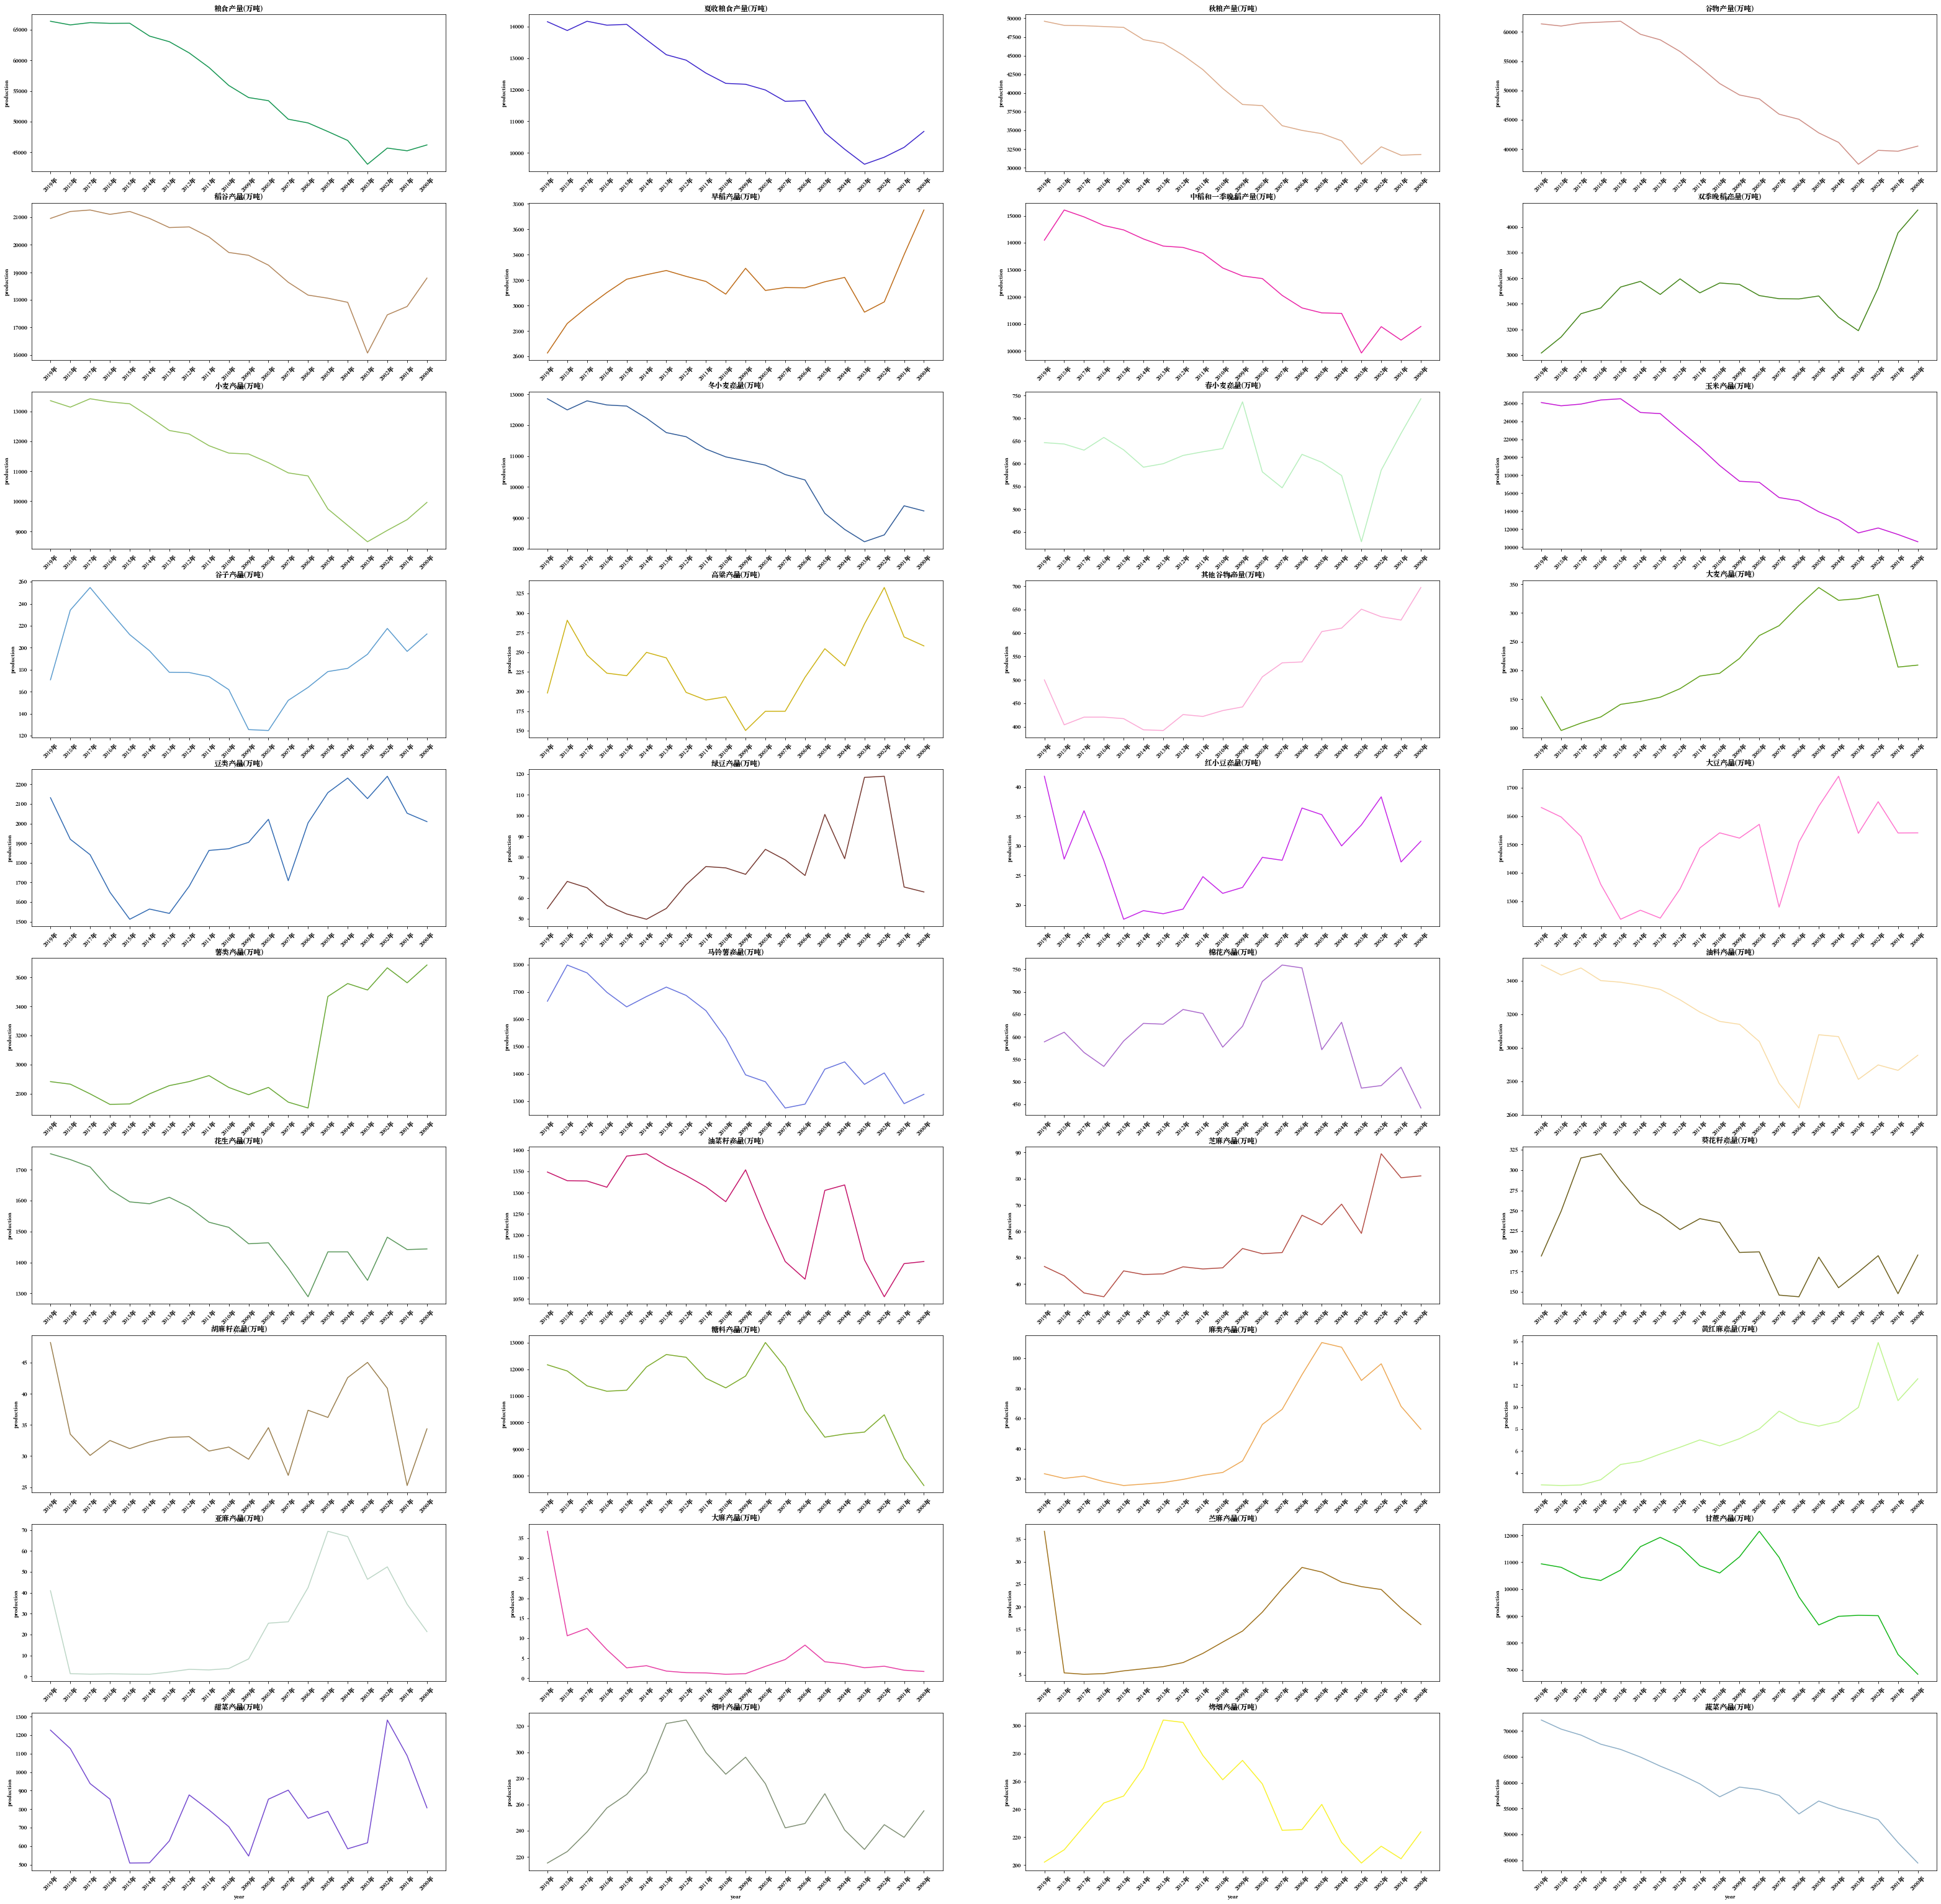

In [207]:
##可视化每一类的走势图
import warnings
plt.rcParams['font.sans-serif']=['Songti SC'] #用来正常显示中文标签
warnings.filterwarnings('ignore')
plt.figure(figsize=(55,55))
for i in range(data.shape[0]):
    plt.subplot(10,4,i+1)
    plt.plot(data.columns,data.iloc[i,:],c=randomcolor())
    plt.xlabel('year')
    plt.ylabel('production')
    plt.xticks(rotation=45)
    plt.title(index[i])
    

<Figure size 3960x3960 with 0 Axes>

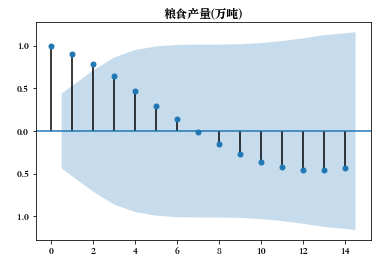

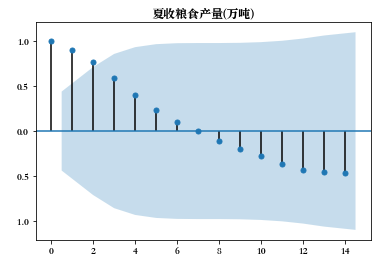

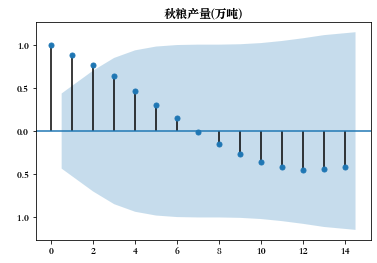

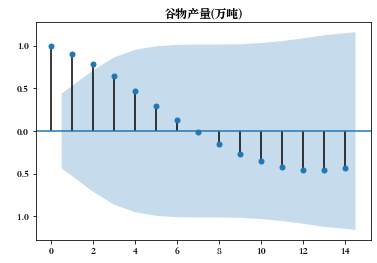

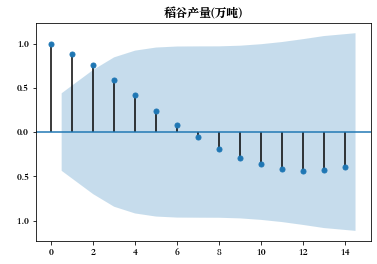

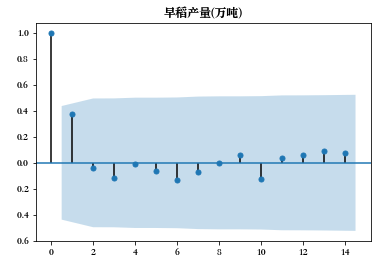

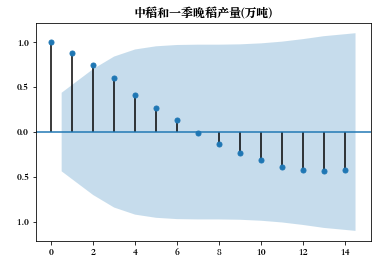

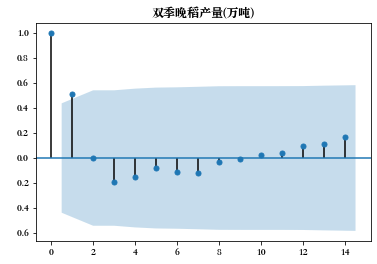

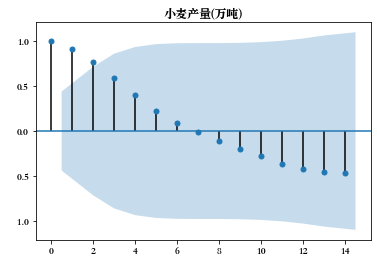

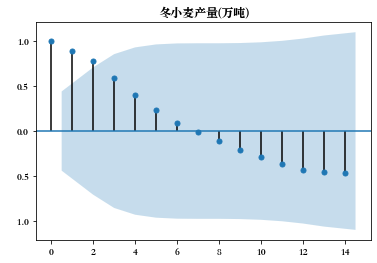

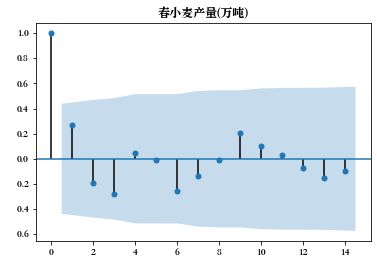

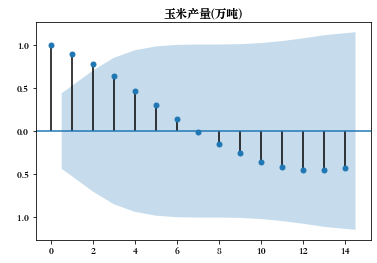

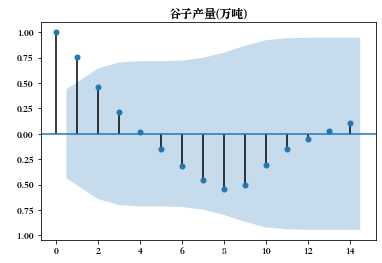

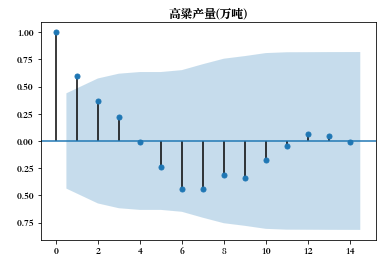

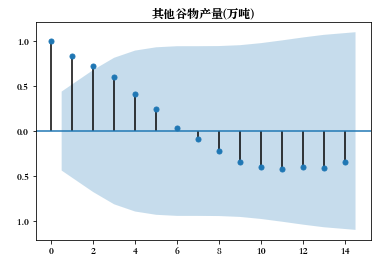

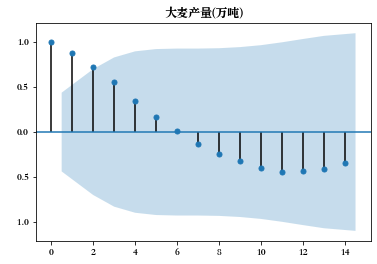

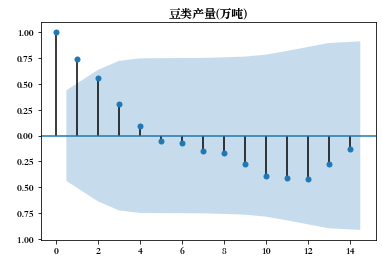

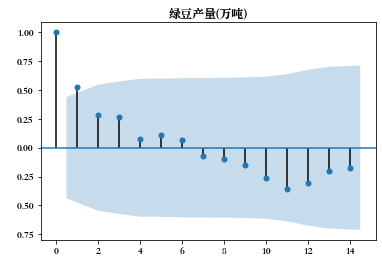

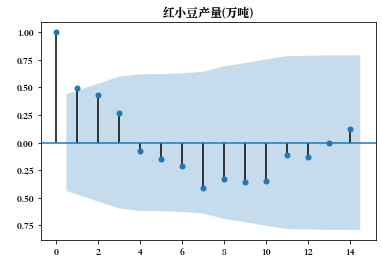

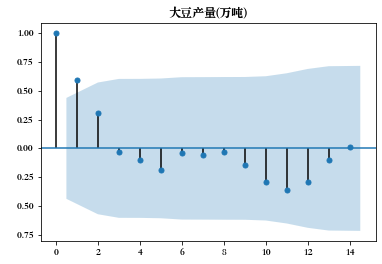

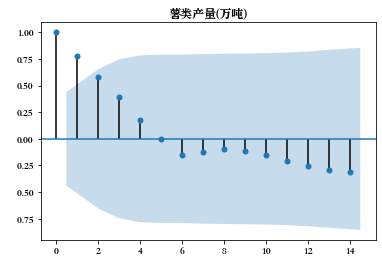

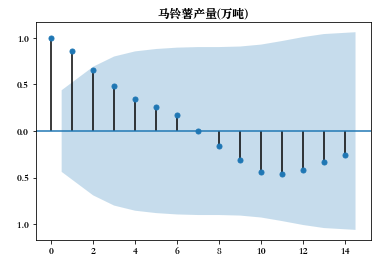

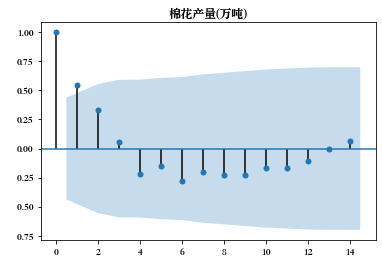

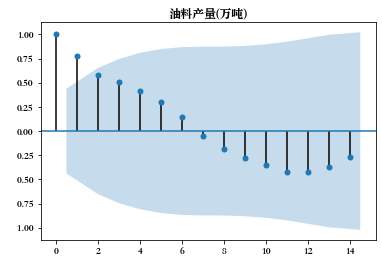

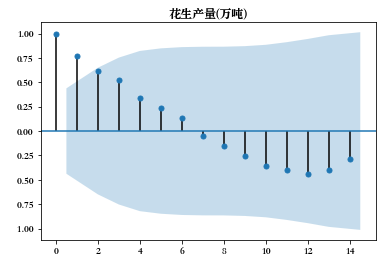

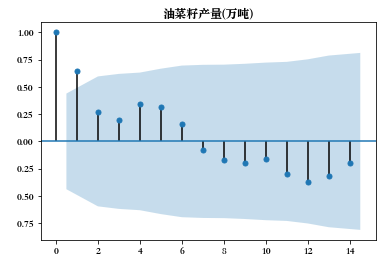

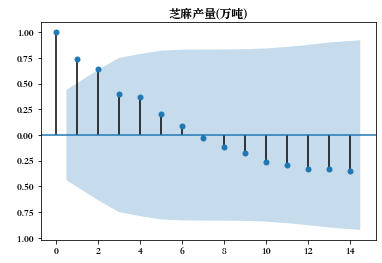

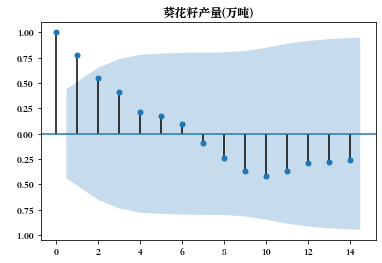

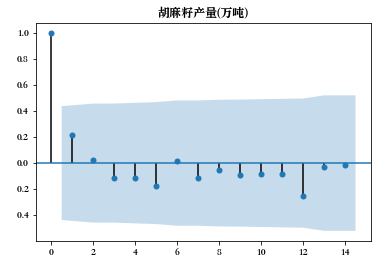

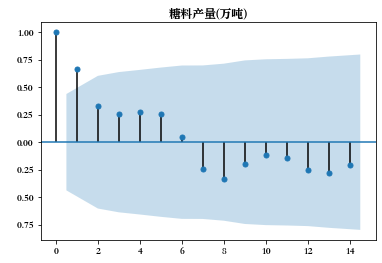

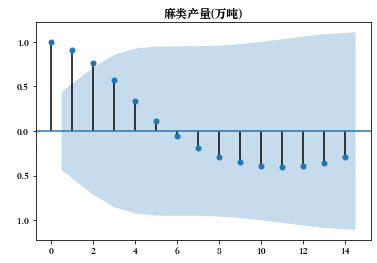

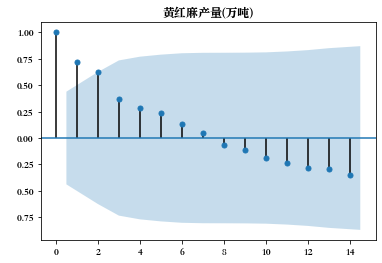

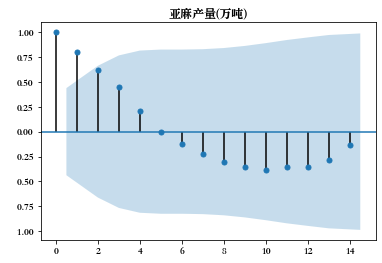

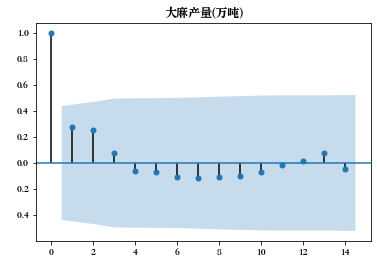

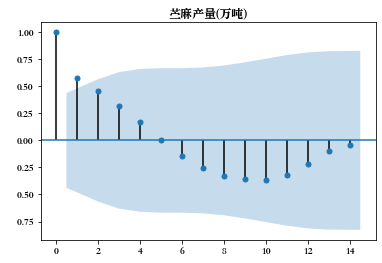

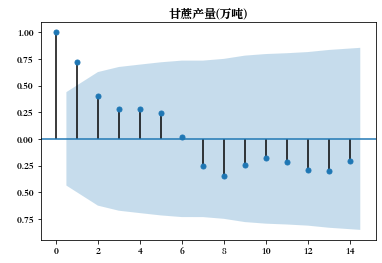

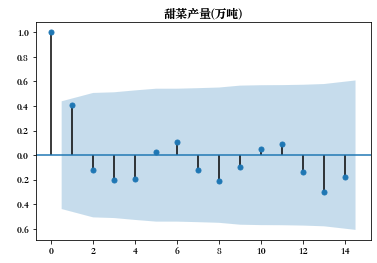

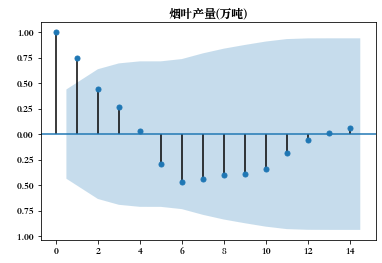

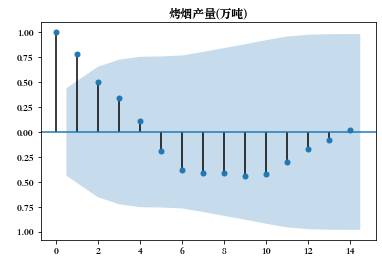

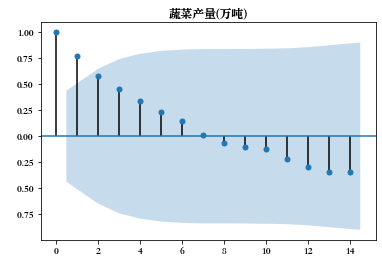

In [208]:
#时间序列分析
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
##可视化每一类的自相关图以及便自相关图
plt.figure(figsize=(55,55))
plt.rcParams['font.sans-serif']=['Songti SC'] #用来正常显示中文标签
for i in range(data.shape[0]):
    plot_acf(data.iloc[i,:]).show()#自相关图
    plt.title(index[i])


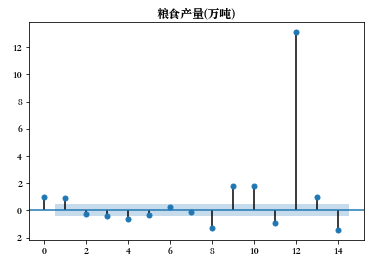

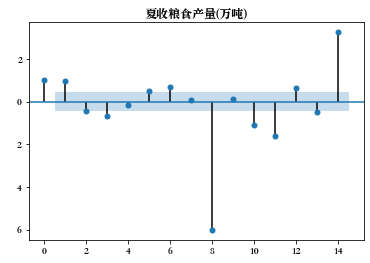

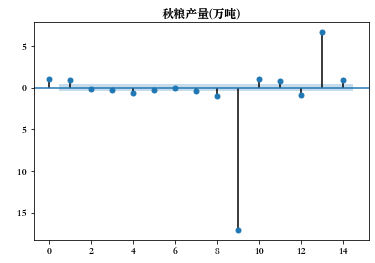

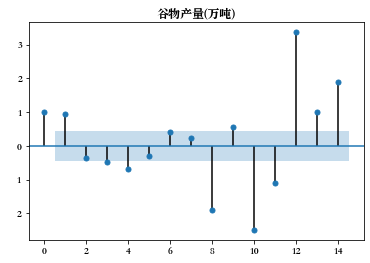

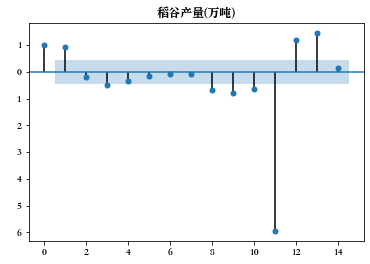

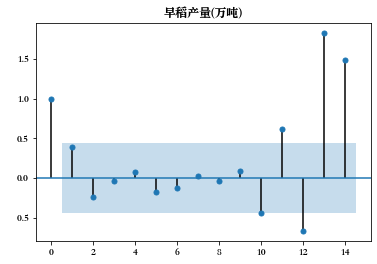

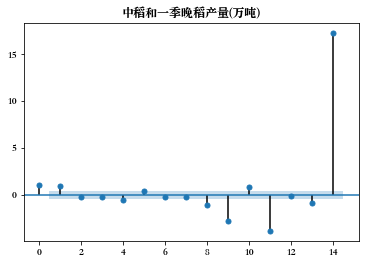

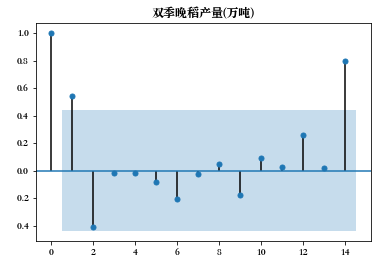

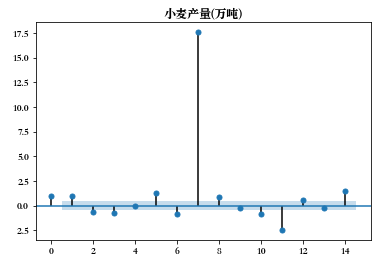

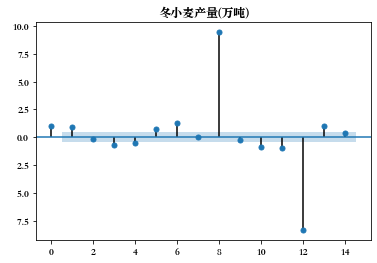

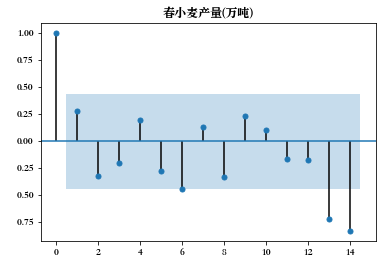

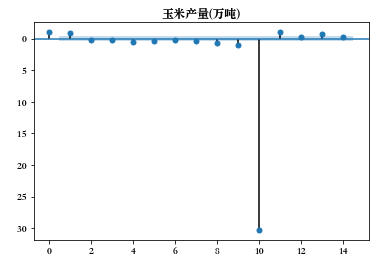

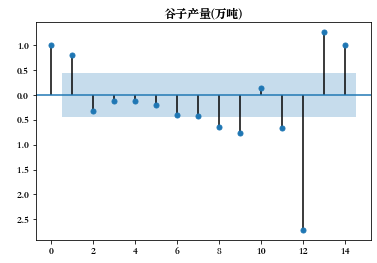

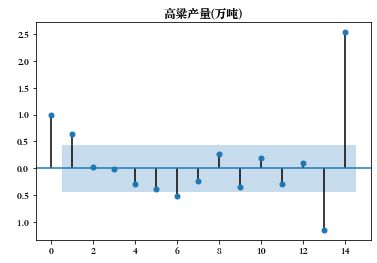

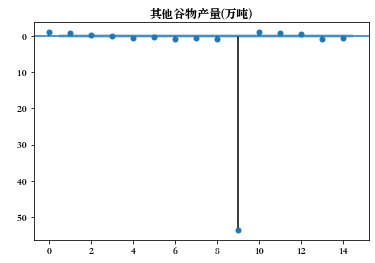

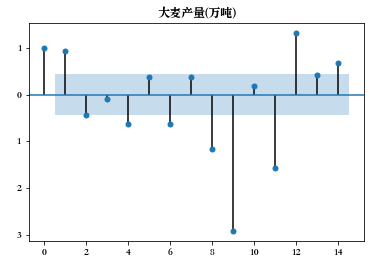

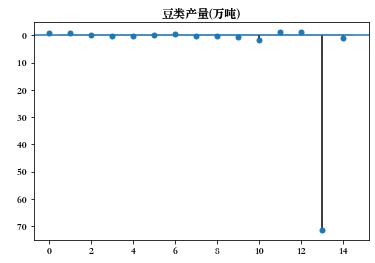

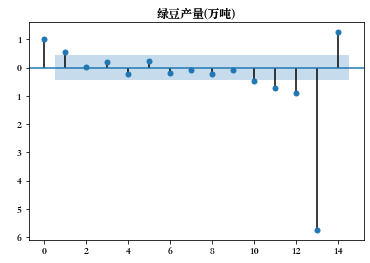

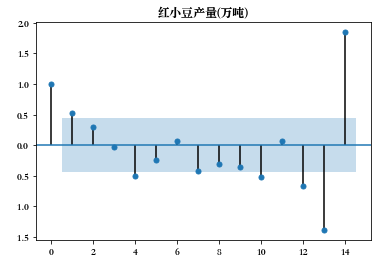

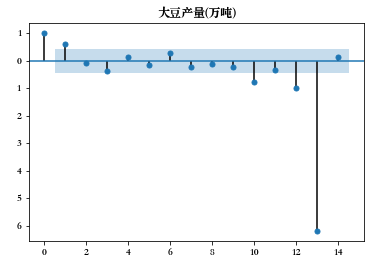

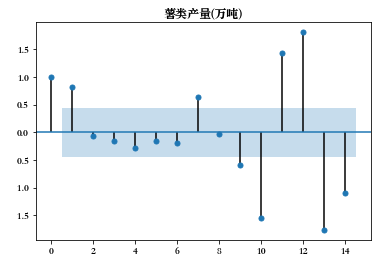

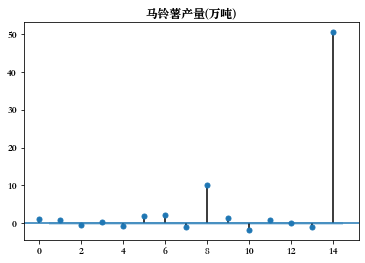

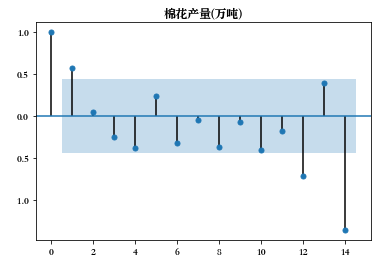

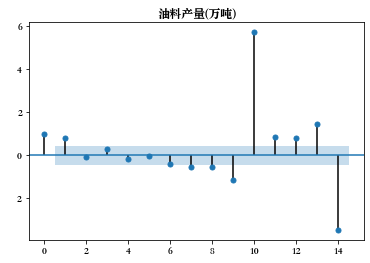

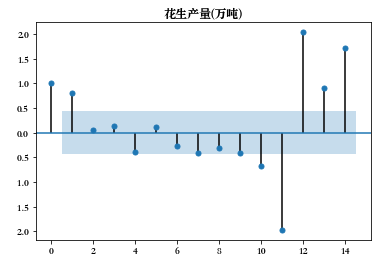

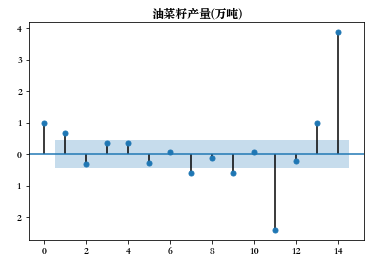

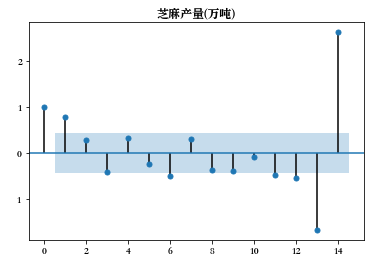

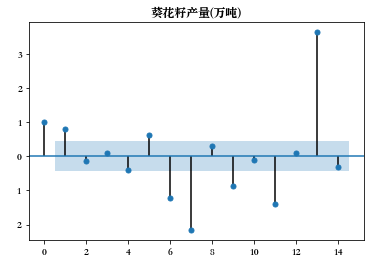

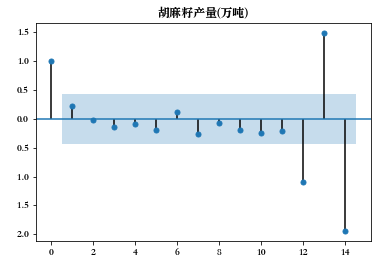

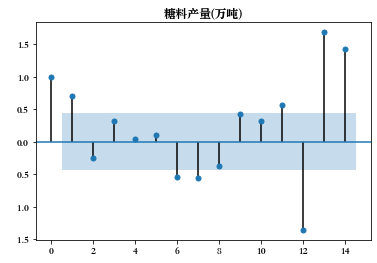

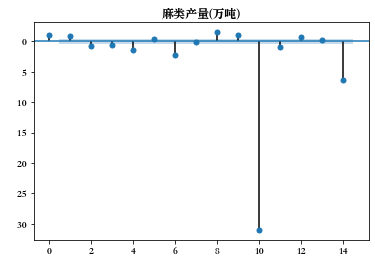

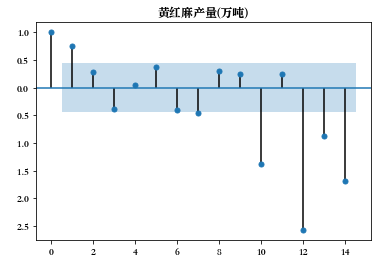

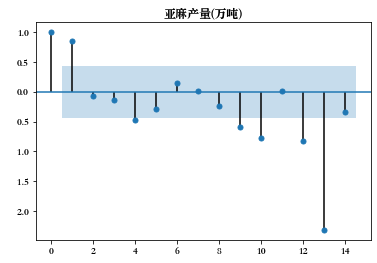

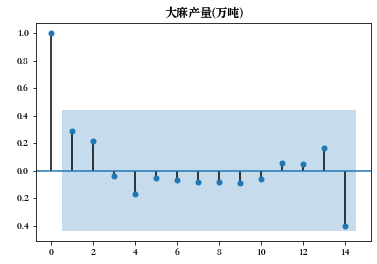

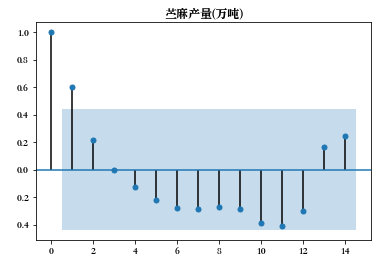

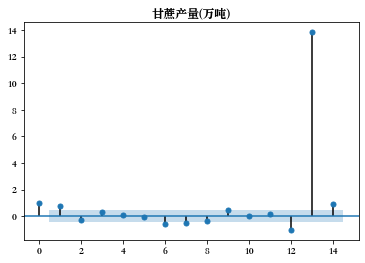

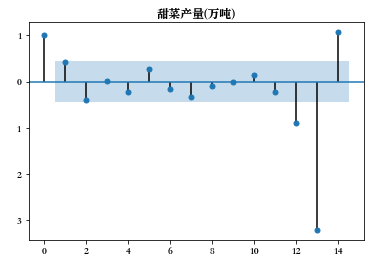

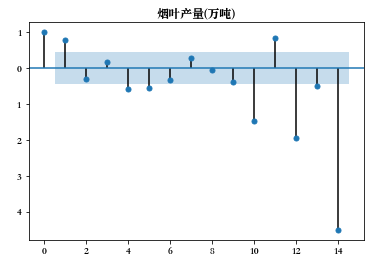

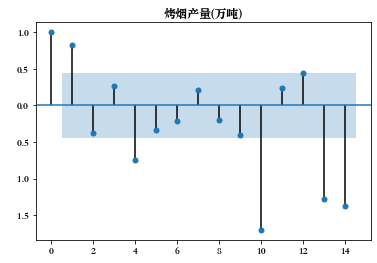

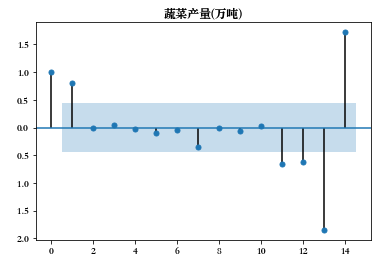

In [209]:
#偏自相关图
for i in range(data.shape[0]):
    plot_pacf(data.iloc[i,:]).show()#自相关图
    plt.title(index[i])

In [210]:
# -*- coding:utf-8 -*-
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.DataFrame.ewm(timeSeries, span=size)
    timeSeries.plot(color='blue',label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries,i):    
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.title(index[i])
    plt.show()

'''　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

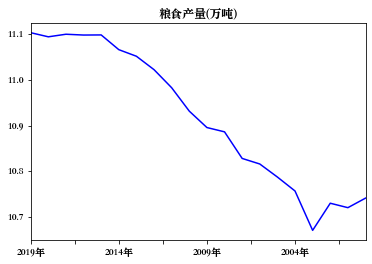

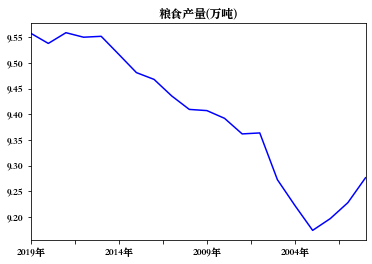

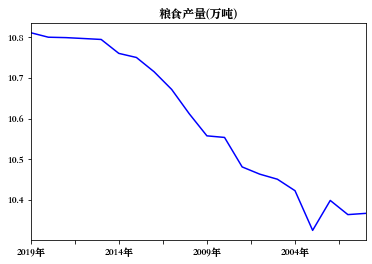

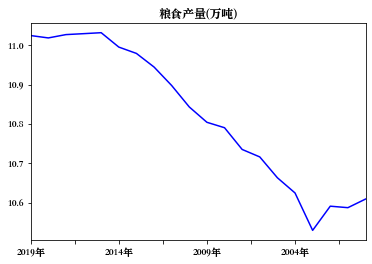

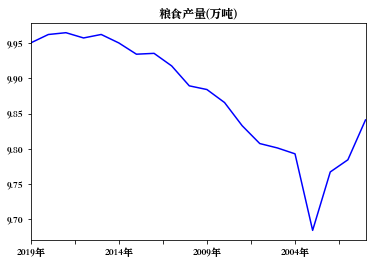

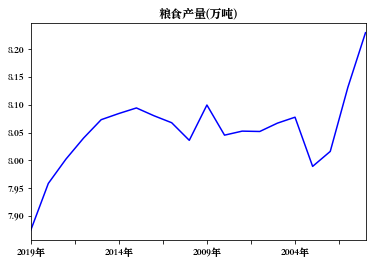

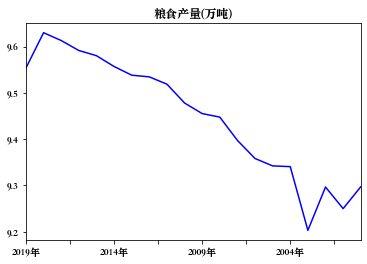

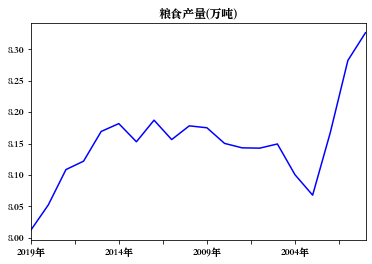

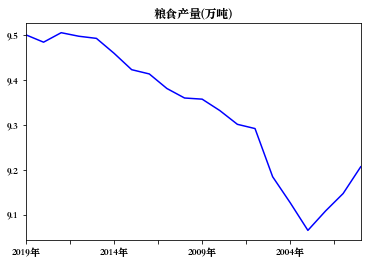

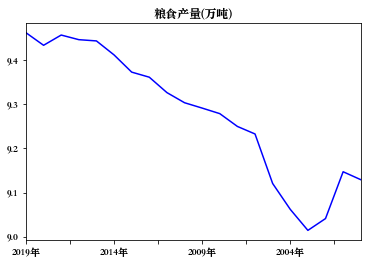

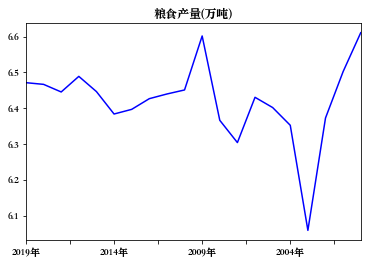

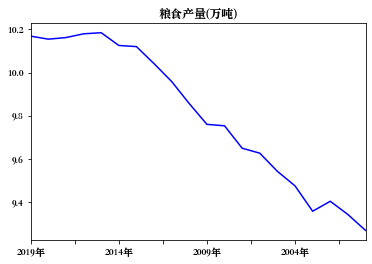

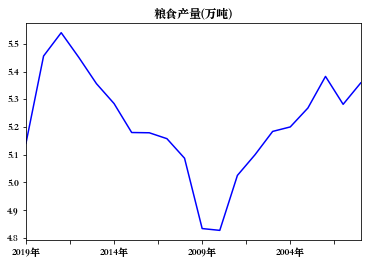

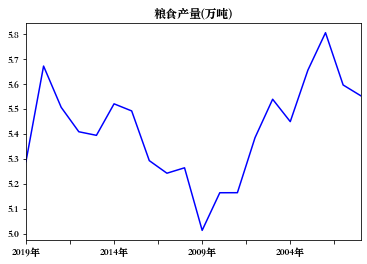

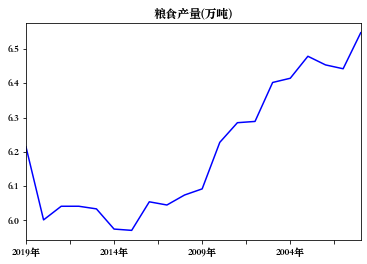

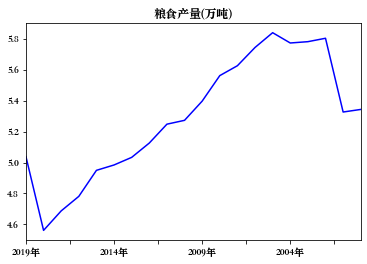

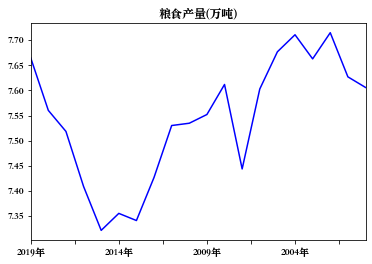

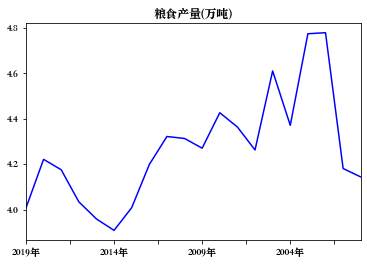

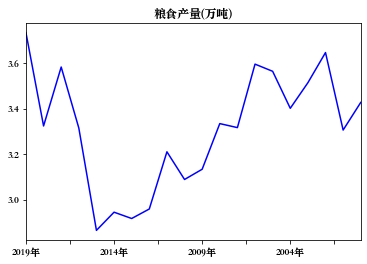

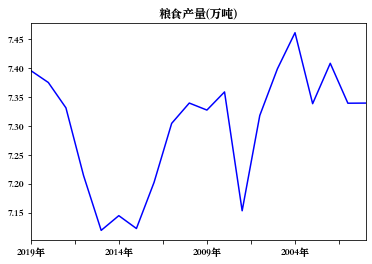

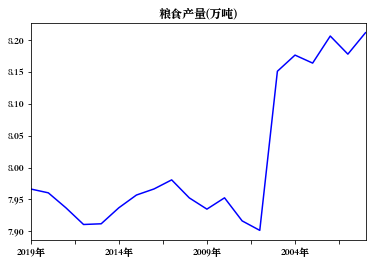

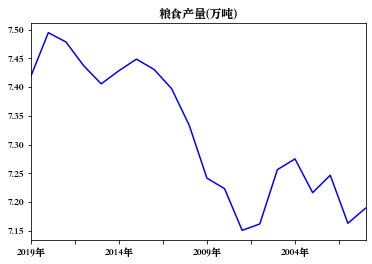

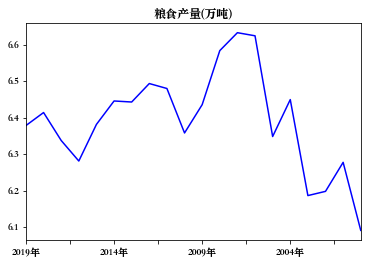

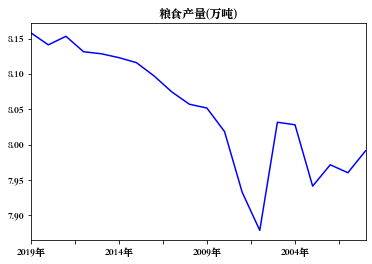

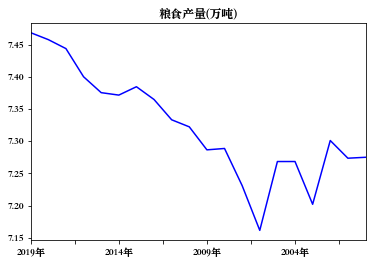

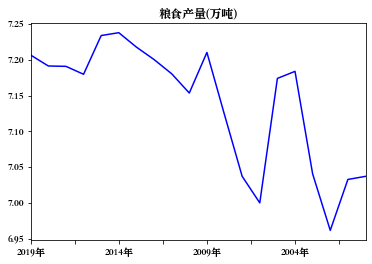

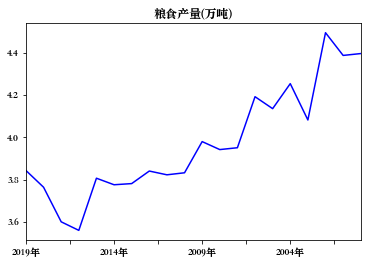

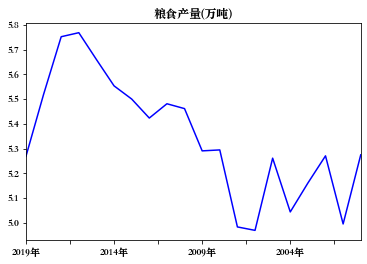

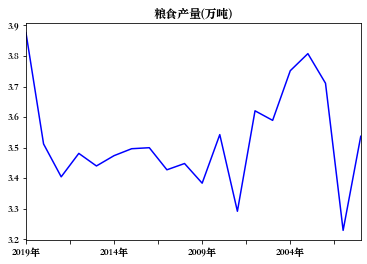

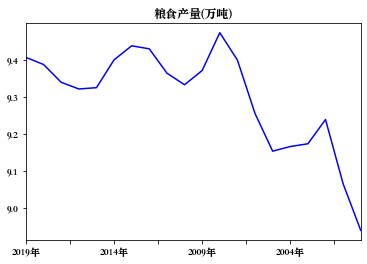

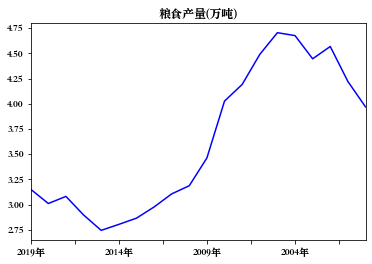

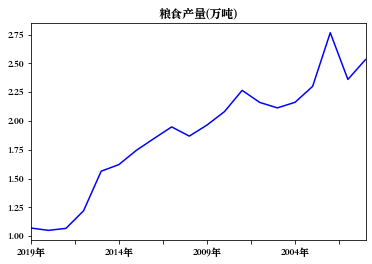

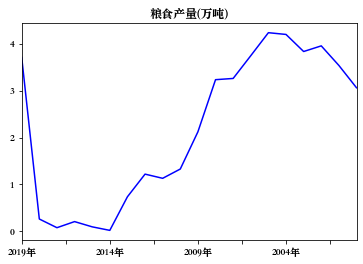

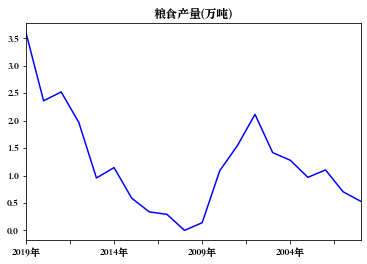

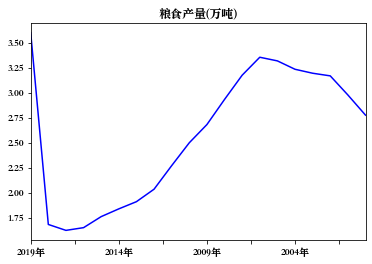

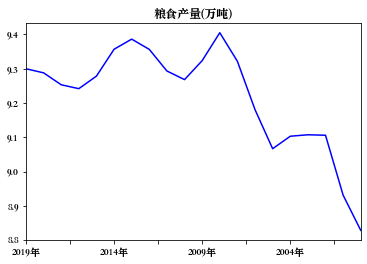

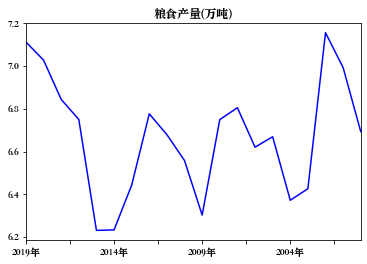

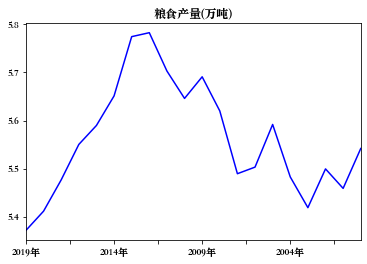

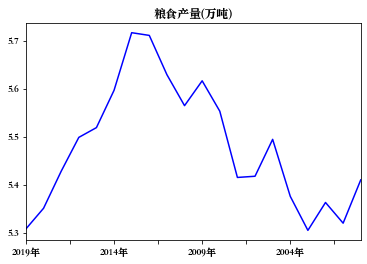

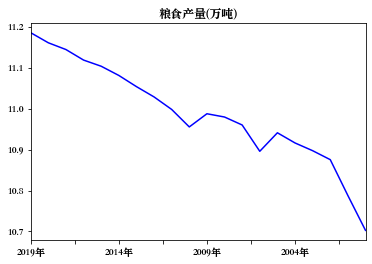

In [225]:
'''对数变换主要是为了减小数据的振动幅度，使其线性规律更加明显（我是这么理解的时间序列模型大部分都是线性的，为了尽量降低非线性的因素，
需要对其进行预处理，也许我理解的不对）。对数变换相当于增加了一个惩罚机制，数据越大其惩罚越大，数据越小惩罚越小。这里强调一下，
变换的序列需要满足大于0，小于0的数据不存在对数变换'''
for i in range(data.shape[0]):
    ts_log = np.log(data.iloc[i,:])
    draw_ts(ts_log,0)

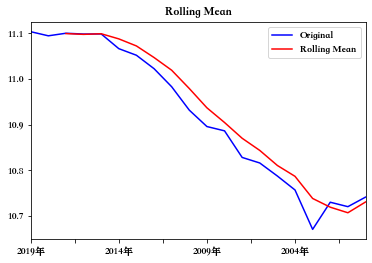

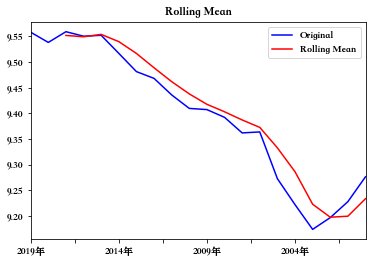

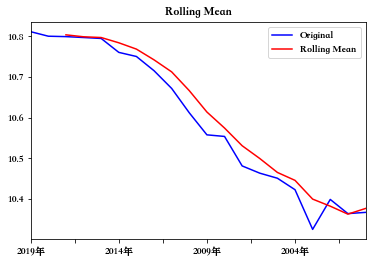

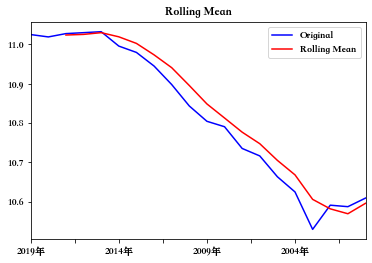

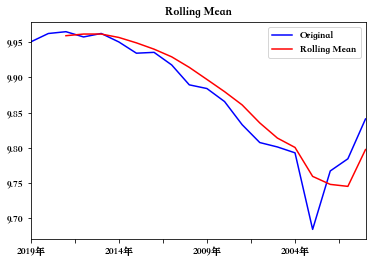

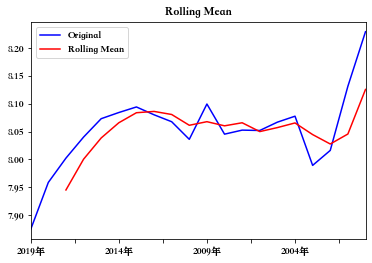

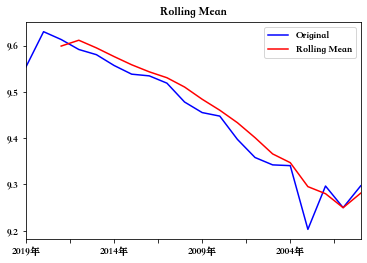

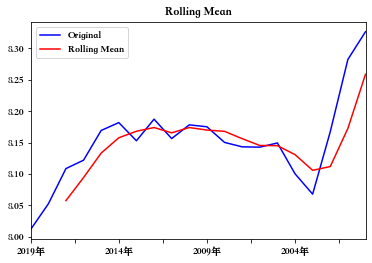

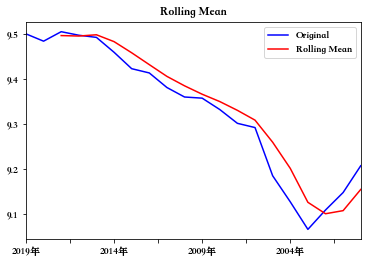

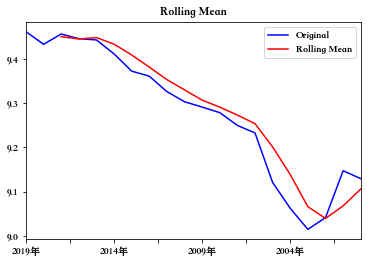

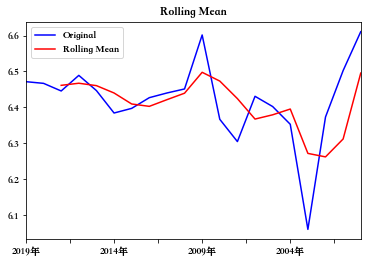

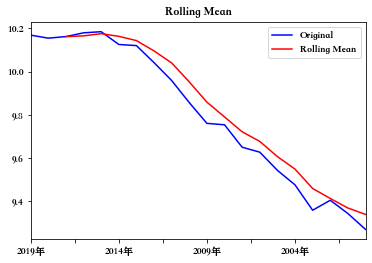

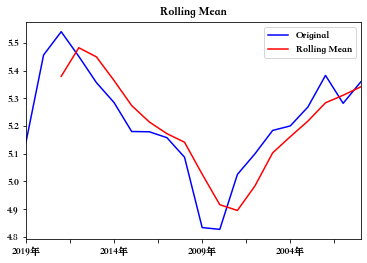

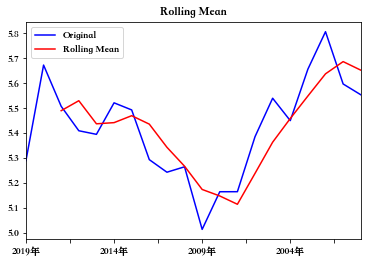

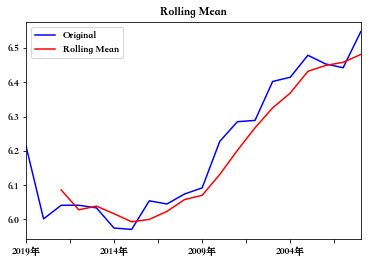

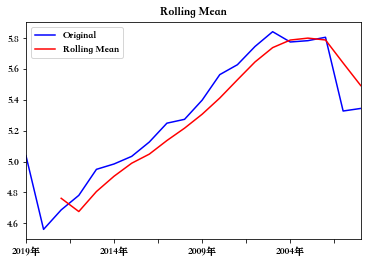

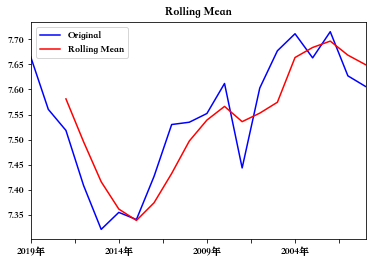

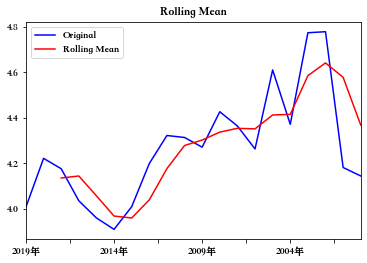

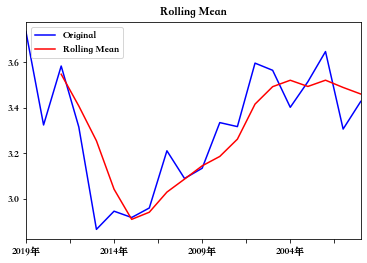

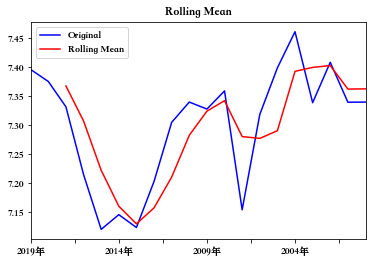

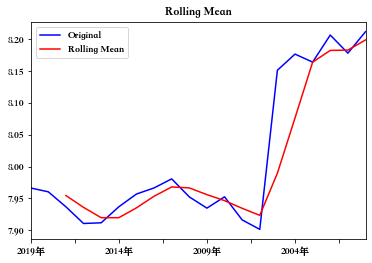

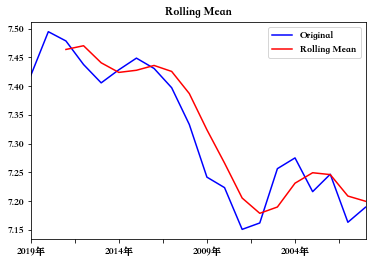

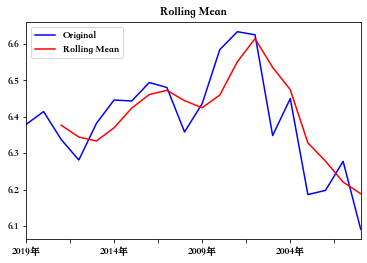

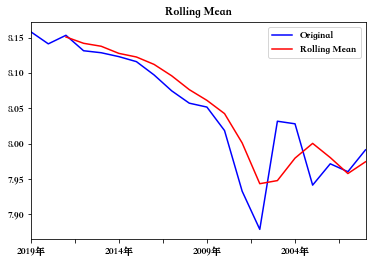

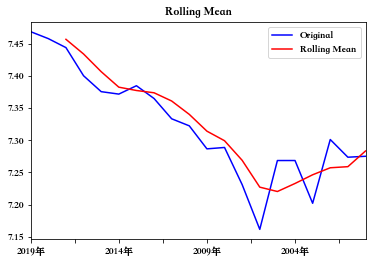

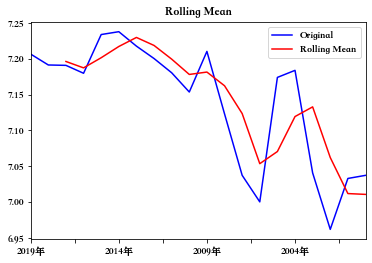

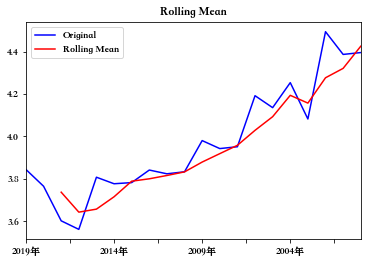

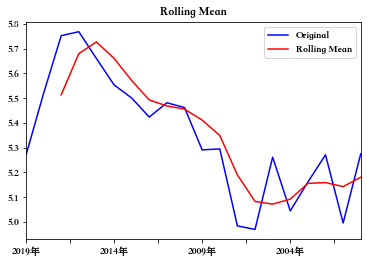

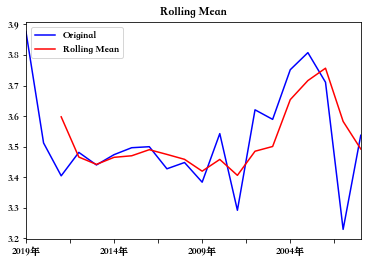

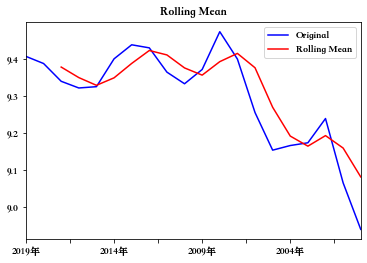

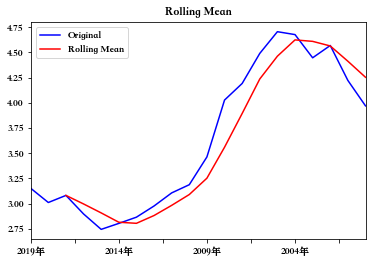

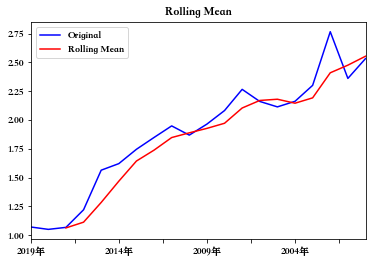

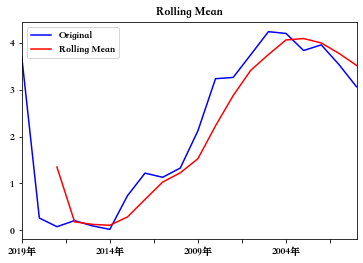

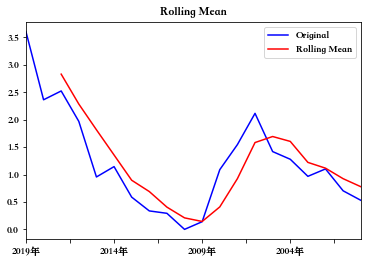

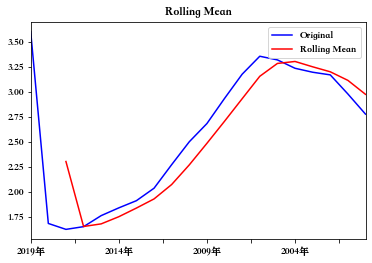

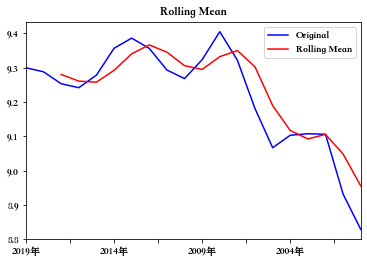

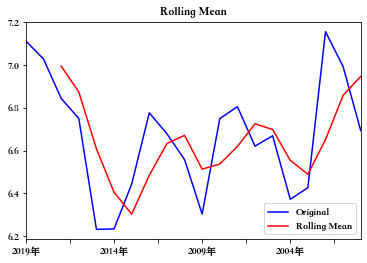

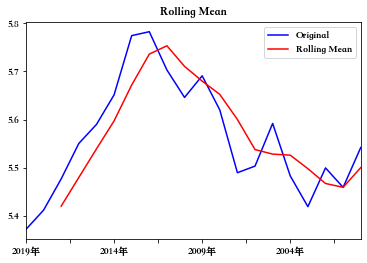

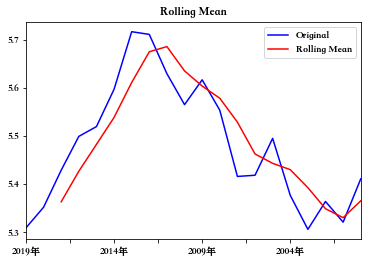

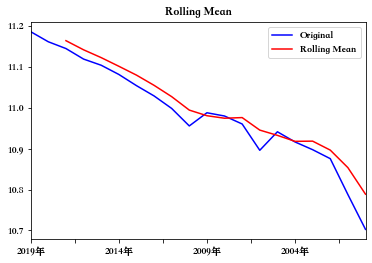

In [228]:
for i in range(data.shape[0]):
    ts_log = np.log(data.iloc[i,:])
    draw_trend(ts_log, 3)#移动平均即利用一定时间间隔内的平均值作为某一期的估计值，而指数平均则是用变权的方法来计算均值
#窗口为3的移动平均能较好的剔除年周期性因素，而指数平均法是对周期内的数据进行了加权，能在一定程度上减小年周期因素，但并不能完全剔除，如要完全剔除可以进一步进行差分操作。

In [213]:
diff_12 = ts_log.diff(12)
diff_12.dropna(inplace=True)
diff_12_1 = diff_12.diff(1)
diff_12_1.dropna(inplace=True)
testStationarity(diff_12_1)

Test Statistic                -2.283021
p-value                        0.177503
#Lags Used                     0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64

In [237]:
#从上面的统计检验结果可以看出，经过12阶差分和1阶差分后，该序列满足平稳性的要求了。
##把index处理为日期格式
data.columns=[i.strip('年') for i in data.columns]
data.columns=pd.to_datetime(data.columns)

In [238]:
data.columns

DatetimeIndex(['2019-01-01', '2018-01-01', '2017-01-01', '2016-01-01',
               '2015-01-01', '2014-01-01', '2013-01-01', '2012-01-01',
               '2011-01-01', '2010-01-01', '2009-01-01', '2008-01-01',
               '2007-01-01', '2006-01-01', '2005-01-01', '2004-01-01',
               '2003-01-01', '2002-01-01', '2001-01-01', '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

In [239]:
data.head()

,2019-01-01,2018-01-01,2017-01-01,2016-01-01,2015-01-01,2014-01-01,2013-01-01,2012-01-01,2011-01-01,2010-01-01,2009-01-01,2008-01-01,2007-01-01,2006-01-01,2005-01-01,2004-01-01,2003-01-01,2002-01-01,2001-01-01,2000-01-01
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
粮食产量(万吨),66384.34,65789.22,66160.72,66043.51,66060.27,63964.83,63048.20,61222.62,58849.33,55911.31,53940.86,53434.29,50413.85,49804.23,48402.19,46946.95,43069.53,45705.75,45263.67,46217.52
夏收粮食产量(万吨),14160.00,13881.02,14174.46,14050.16,14074.94,13587.52,13112.33,12939.98,12529.47,12203.61,12175.18,11993.11,11633.72,11655.96,10639.86,10114.13,9637.61,9861.33,10173.40,10679.27
秋粮产量(万吨),49597.00,49049.18,48999.10,48890.78,48778.09,47134.25,46660.07,45052.75,43130.10,40617.59,38472.42,38322.15,35638.37,35008.49,34575.08,33611.17,30483.67,32815.45,31690.00,31786.35
谷物产量(万吨),61369.73,61003.58,61520.54,61666.53,61818.41,59601.54,58650.35,56659.03,54061.73,51196.75,49243.35,48569.44,45962.96,45099.24,42776.01,41157.21,37428.73,39798.66,39648.21,40522.36
稻谷产量(万吨),20961.40,21212.90,21267.59,21109.42,21214.19,20960.91,20628.56,20653.23,20288.25,19722.57,19619.67,19261.22,18638.11,18171.83,18058.84,17908.76,16065.56,17453.85,17758.03,18790.77


In [262]:
ts_log=np.log(data.iloc[0,:])


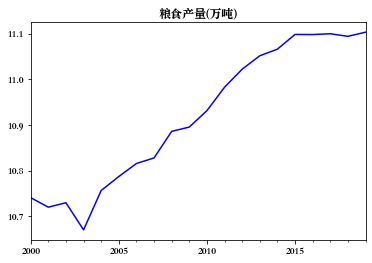

In [264]:

draw_ts(ts_log,0)

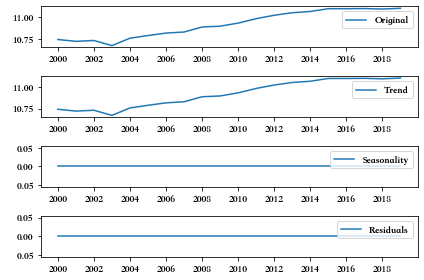

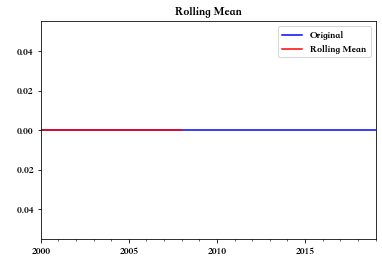

Test Statistic                       NaN
p-value                              NaN
#Lags Used                      0.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64

In [288]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(timeseries):
    
    # 返回包含三个部分 trend（趋势部分） ， seasonal（季节性部分） 和residual (残留部分)
    decomposition = seasonal_decompose(timeseries)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return trend , seasonal, residual
trend , seasonal, residual = decompose(ts_log)
residual.dropna(inplace=True)
draw_trend(residual,12)
testStationarity(residual)


In [271]:
rol_mean = ts_log.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
testStationarity(ts_diff_1)

Test Statistic                -1.743063
p-value                        0.409073
#Lags Used                     2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64

Test Statistic                -4.118141
p-value                        0.000904
#Lags Used                     0.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64

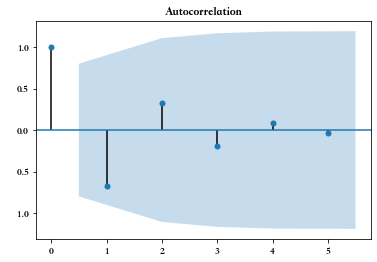

In [325]:
'''观察其统计量发现该序列在置信水平为95%的区间下并不显著，我们对其进行再次一阶差分。再次差分后的序列其自相关具有快速衰减的特点，t统计量在99%的置信水平下是显著的'''
ts_diff_2 = ts_diff_1.diff(1).diff(1)
ts_diff_2.dropna(inplace=True)
plot_acf(ts_diff_2).show()
testStationarity(ts_diff_2) ###p值小于0.005 已经平稳了

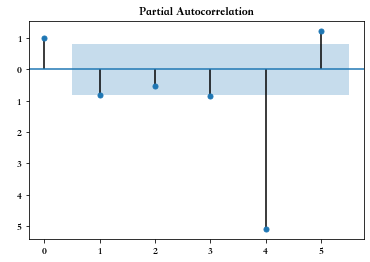

In [326]:
plot_pacf(ts_diff_2).show()

In [327]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_diff_1,order=(0,1,1)) 
result_arima = model.fit(disp=-1, method='mle')

In [328]:
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

In [332]:
data=pd.DataFrame(np.array(data).T,columns=data.index,index=data.columns)
data

Unnamed: 0,粮食产量(万吨),夏收粮食产量(万吨),秋粮产量(万吨),谷物产量(万吨),稻谷产量(万吨),早稻产量(万吨),中稻和一季晚稻产量(万吨),双季晚稻产量(万吨),小麦产量(万吨),冬小麦产量(万吨),...,麻类产量(万吨),黄红麻产量(万吨),亚麻产量(万吨),大麻产量(万吨),苎麻产量(万吨),甘蔗产量(万吨),甜菜产量(万吨),烟叶产量(万吨),烤烟产量(万吨),蔬菜产量(万吨)
2019-01-01,66384.34,14160.00,49597.00,61369.73,20961.40,2627.00,14096.698,3016.6026,13359.63,12862.2221,...,23.39,2.92,41.0094,36.745,36.745,10938.81,1227.29,215.34,202.11,72102.56
2018-01-01,65789.22,13881.02,49049.18,61003.58,21212.90,2859.02,15212.370,3141.5200,13144.05,12500.5200,...,20.31,2.86,1.3000,10.620,5.390,10809.71,1127.66,224.10,210.97,70346.72
2017-01-01,66160.72,14174.46,48999.10,61520.54,21267.59,2987.16,14957.280,3323.1500,13424.13,12794.0900,...,21.79,2.91,1.0800,12.470,5.080,10440.43,938.41,239.14,227.87,69192.68
2016-01-01,66043.51,14050.16,48890.78,61666.53,21109.42,3102.57,14638.860,3367.9900,13318.83,12660.8400,...,18.13,3.39,1.2300,7.160,5.220,10321.54,854.49,257.39,244.50,67434.16
2015-01-01,66060.27,14074.94,48778.09,61818.41,21214.19,3207.25,14475.730,3531.2200,13255.52,12624.8000,...,15.56,4.78,1.1000,2.600,5.830,10706.43,508.79,267.73,249.52,66425.10
2014-01-01,63964.83,13587.52,47134.25,59601.54,20960.91,3243.05,14142.340,3575.5200,12823.52,12230.9900,...,16.51,5.06,1.0200,3.140,6.300,11578.82,509.91,284.67,269.68,64948.65
2013-01-01,63048.20,13112.33,46660.07,58650.35,20628.56,3275.81,13879.090,3473.6700,12363.93,11763.6800,...,17.56,5.73,2.0900,1.800,6.770,11926.35,628.66,321.95,304.02,63197.98
2012-01-01,61222.62,12939.98,45052.75,56659.03,20653.23,3229.89,13828.230,3595.1100,12247.49,11629.1000,...,19.62,6.35,3.3900,1.400,7.670,11574.61,877.20,324.60,302.31,61624.46
2011-01-01,58849.33,12529.47,43130.10,54061.73,20288.25,3189.76,13612.620,3485.8700,11856.95,11230.4500,...,22.34,7.02,3.1000,1.340,9.710,10867.35,795.76,299.78,278.58,59766.63
2010-01-01,55911.31,12203.61,40617.59,51196.75,19722.57,3090.10,13069.660,3562.8100,11609.34,10975.7600,...,24.23,6.48,3.7800,1.000,12.210,10598.23,705.12,283.20,261.19,57264.86


In [386]:
ts1 = data.iloc[:,0]# 过滤没有预测的记录plt.figure(facecolor='white')
ts=ts1[log_recover.index]

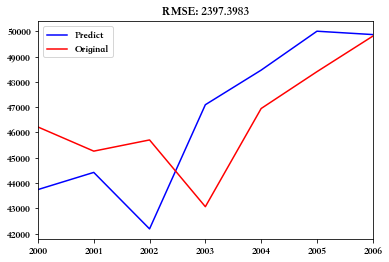

In [387]:
# ts = ts[log_recover.index]  # 过滤没有预测的记录plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
##可视化预测结果
plt.show()

Text(0.5, 1.0, '粮食产量(万吨)')

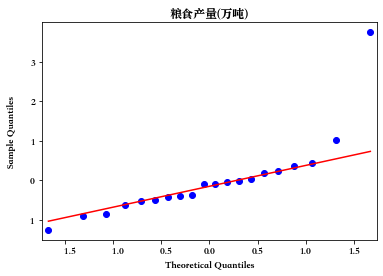

In [424]:
'''残差白噪声检验
如果残差是白噪声序列，说明时间序列中有用的信息已经被提取完毕了，剩下的全是随机扰动，是无法预测和使用的。
残差序列如果通过了白噪声检验，则建模就可以终止了，因为没有信息可以继续提取。如果残差如果未通过白噪声检验，
说明残差中还有有用的信息，需要修改模型或者进一步提取。
绘制白噪声序列的qq图'''
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_model import ARMA
resid=ARMA(ts1,(1,0)).fit()
a=resid.resid
fig=plt.figure()
ax=fig.add_subplot(111)
fig=qqplot(a,line='q',fit=True,ax=ax)
plt.title(data.columns[0])

In [425]:
ts1

2019-01-01    66384.34
2018-01-01    65789.22
2017-01-01    66160.72
2016-01-01    66043.51
2015-01-01    66060.27
2014-01-01    63964.83
2013-01-01    63048.20
2012-01-01    61222.62
2011-01-01    58849.33
2010-01-01    55911.31
2009-01-01    53940.86
2008-01-01    53434.29
2007-01-01    50413.85
2006-01-01    49804.23
2005-01-01    48402.19
2004-01-01    46946.95
2003-01-01    43069.53
2002-01-01    45705.75
2001-01-01    45263.67
2000-01-01    46217.52
Name: 粮食产量(万吨), dtype: float64

In [426]:
#通过qq图可以看出，残差序列可以认为是正态分布
##预测后面几年的产量
predict=resid.predict(start=0,end=4)
predict.index=['2020年','2021年','2022年','2023年','2024年']

In [427]:
##可视化
predict

2020年    56224.114346
2021年    66198.519637
2022年    65614.283787
2023年    65978.989424
2024年    65863.923077
dtype: float64